# 音频处理 

## 提取任意一段不小于10s的wav音频的声谱图特征和MFCC特征

#### 波形图

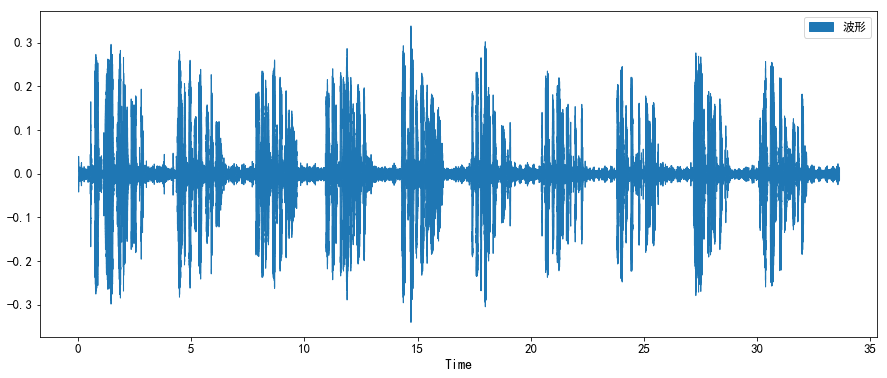

In [57]:
import librosa
import librosa.display
audio = "OSR_us_000_0010_8k.wav"
data1, sampling_rate1 = librosa.load('OSR_us_000_0010_8k.wav', sr=22050)
plt.figure(figsize=(15,6))
librosa.display.waveshow(data1, label = "波形",sr = sampling_rate1)
plt.tick_params(axis = 'both', which = 'major', labelsize = 13)
plt.xlabel('Time',fontsize = 14)
plt.legend(loc=1,prop = {'size' : 12})

#### 频谱质心

(1449,)


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Pass y=[-0.02815123 -0.03725448 -0.04079068 ... -0.00920534 -0.00638217
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  after removing the cwd from sys.path.


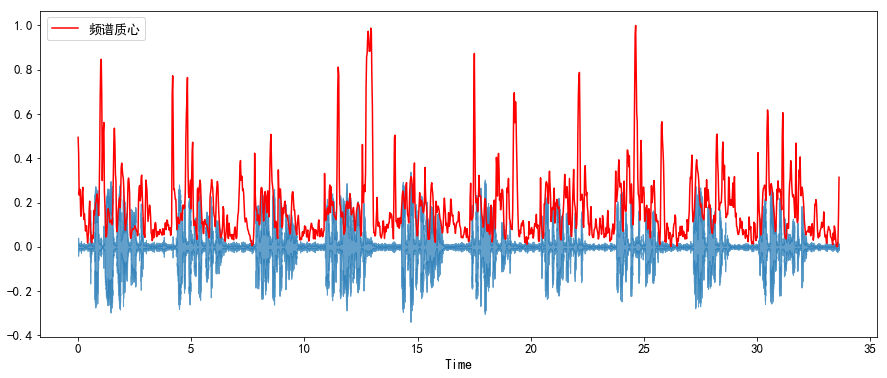

In [56]:
import matplotlib.pyplot as plt
import sklearn
x, sr = librosa.load('OSR_us_000_0010_8k.wav')
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
print(spectral_centroids.shape)
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

def normalize(x, axis = 0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)


# 频谱质心 （Spectral Centroid） 是描述音色属性的重要物理参数之一，是频率成分的重心，
# 是在一定频率范围内通过能量加权平均的频率，其单位是Hz。它是声音信号的频率分布和能量分布的重要信息。
plt.figure(figsize=(15,6))
librosa.display.waveshow(x, sr=sr, alpha=0.7)
plt.plot(t, normalize(spectral_centroids),label = "频谱质心", color='r')

plt.tick_params(axis = 'both', which = 'major', labelsize = 13)
plt.tick_params(axis = 'x', which = 'major', labelsize = 13)
plt.xlabel('Time',fontsize = 14)
plt.legend(loc=2,prop = {'size' : 13})


#### 声谱衰弱

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Pass y=[-0.01815123 -0.02725448 -0.03079068 ...  0.00079466  0.00361783
  0.01      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  after removing the cwd from sys.path.


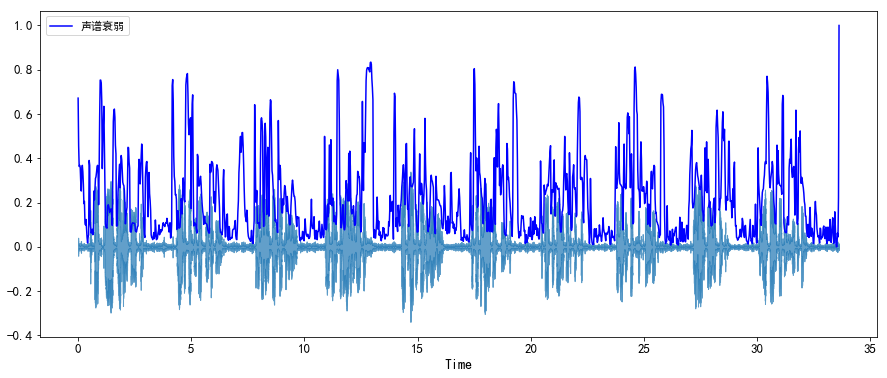

In [58]:
# 声谱衰弱，spectral roll-off 是对声音信号形状（波形图）的一种衡量，表示低于总频谱能量的指定百分比的频率(默认为85%)。

plt.figure(figsize=(15,6))
spectral_rolloff = librosa.feature.spectral_rolloff(x + 0.01, sr = sr)[0]
librosa.display.waveshow(x, sr=sr, alpha=0.7)
plt.plot(t, normalize(spectral_rolloff),label = "声谱衰弱",color='b')

plt.tick_params(axis = 'both', which = 'major', labelsize = 13)
plt.tick_params(axis = 'x', which = 'major', labelsize = 13)
plt.xlabel('Time',fontsize = 14)
plt.legend(loc=2,prop = {'size' : 11})

#### 色度频率

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Pass y=[-0.02815123 -0.03725448 -0.04079068 ... -0.00920534 -0.00638217
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """


Text(0,0.5,'Pitch Class')

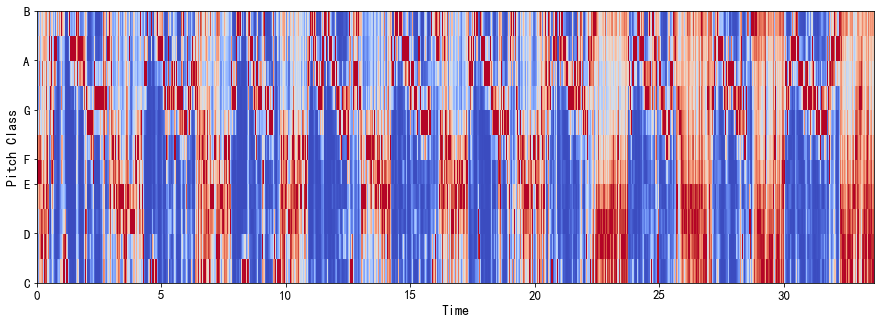

In [59]:
# 色度频率是音乐音频有趣且强大的表示，其中整个频谱被投影到12个区间，代表音乐八度音的12个不同的半音（或色度）

x, sr = librosa.load('OSR_us_000_0010_8k.wav')
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize = (15,5))
librosa.display.specshow(chromagram, x_axis="time", y_axis="chroma", hop_length = hop_length, cmap='coolwarm')

plt.tick_params(axis = 'both', which = 'major', labelsize = 13)
plt.xlabel('Time',fontsize = 14)
plt.ylabel('Pitch Class',fontsize = 14)


## 声谱图，宽带 + 窄带

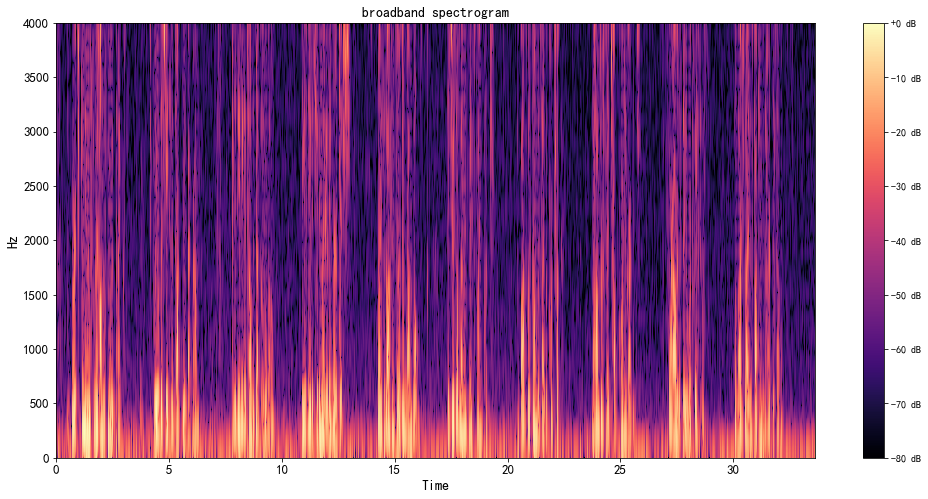

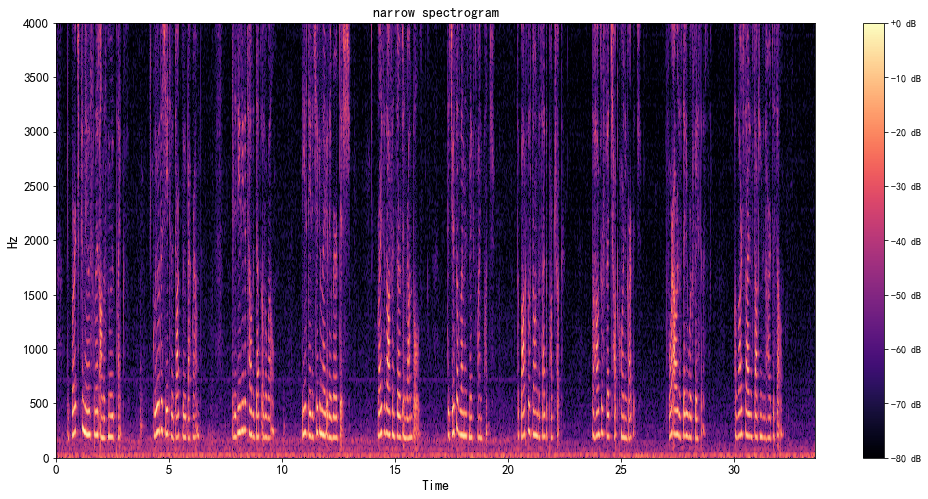

In [5]:
import matplotlib.pyplot as plt   #画图用
import librosa.core as lc   #计算stft使用
import numpy as np   #使用了其中的一些工具函数
import librosa.display   #画声谱图用
from scipy.io import wavfile   #获取wav文件的采样率

path = "OSR_us_000_0010_8k.wav"    
fs, y_ = wavfile.read(path)        #读取文件的采样率
fs = fs       
n_fft = 1024         #FFT长度
y, sr = librosa.load(path, sr=fs)
plt.figure(figsize=(17,8))
#获取宽带声谱图
mag = np.abs(lc.stft(y, n_fft=n_fft, hop_length=10, win_length=40, window='hamming'))        #进行短时傅里叶变换，并获取幅度
D = librosa.amplitude_to_db(mag, ref=np.max)    #幅度转换为db单位
librosa.display.specshow(D, sr=fs, hop_length=10, x_axis='s', y_axis='linear')             #画声谱图


plt.colorbar(format='%+2.0f dB')
plt.title('broadband spectrogram',fontsize = 14)


plt.tick_params(axis = 'both', which = 'major', labelsize = 13)
plt.xlabel('Time',fontsize = 14)
plt.ylabel('Hz',fontsize = 14)
plt.show()

plt.figure(figsize=(17,8))
#获取窄带声谱图
mag1 = np.abs(lc.stft(y, n_fft=n_fft, hop_length=100, win_length=400, window='hamming'))
mag1_log = 20*np.log(mag1)
D1 = librosa.amplitude_to_db(mag1, ref=np.max)
librosa.display.specshow(D1, sr=fs, hop_length=100, x_axis='s', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('narrow spectrogram',fontsize = 14)
plt.tick_params(axis = 'both', which = 'major', labelsize = 13)
plt.xlabel('Time',fontsize = 14)
plt.ylabel('Hz',fontsize = 14)
plt.show()


In [4]:
print(fs)

8000


## MFCC 特征

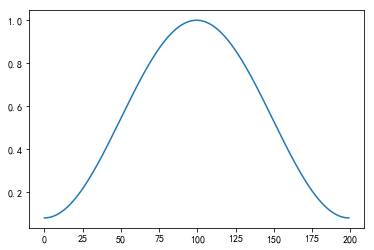

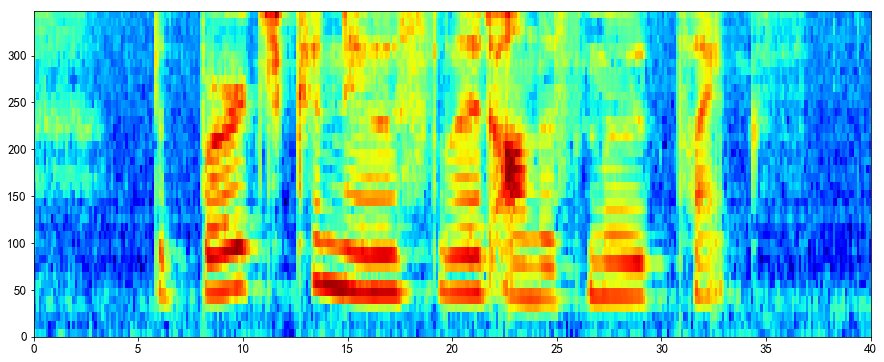

In [7]:
import numpy as np
import scipy.io.wavfile
import matplotlib.pylab as plt
sample_rate, signal = scipy.io.wavfile.read("OSR_us_000_0010_8k.wav")
signal = signal[0: int(3.5*sample_rate)]
t = np.linspace(0, 3.5, num=len(signal))

pre_emphasis = 0.97
emphasized_signal = np.append(signal[0], signal[1:] - pre_emphasis*signal[:-1])
frame_size = 0.025
frame_stride = 0.01
frame_length, frame_step = frame_size*sample_rate, frame_stride*sample_rate
signal_length = len(emphasized_signal)
frame_length = int(round(frame_length))
num_frames = int(np.ceil(float(np.abs(signal_length - frame_length)) / frame_step))
pad_signal_length = num_frames * frame_step + frame_length
z = np.zeros(int(pad_signal_length - signal_length))
pad_signal = np.append(emphasized_signal, z)
indices = np.tile(np.arange(0, frame_length), (num_frames, 1)) + np.tile(np.arange(0, num_frames*frame_step, frame_step), (frame_length, 1)).T
frames = pad_signal[indices.astype(np.int32, copy=False)]
ham = np.hamming(frame_length)

plt.plot(ham)
plt.show()

frames *= ham

NFFT = 512
mag_frames = np.absolute(np.fft.rfft(frames, NFFT))
pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))  #(348, 257)

nfilt = 40
low_freq_mel = 0
high_freq_mel = (2595 * np.log10(1 + (sample_rate/2) / 700))

mel_points = np.linspace(low_freq_mel, high_freq_mel, nfilt + 2)

hz_points = (700 * (10**(mel_points / 2595) - 1))

bin = np.floor((NFFT + 1)*hz_points / sample_rate)
fbank = np.zeros((nfilt, int(np.floor(NFFT / 2 + 1))))
for m in range(1, nfilt + 1):
    f_m_minus = int(bin[m-1])
    f_m = int(bin[m])
    f_m_plus = int(bin[m+1])

    for k in range(f_m_minus, f_m):
        fbank[m-1, k] = (k-bin[m-1]) / (bin[m]-bin[m - 1])
    for k in range(f_m, f_m_plus):
        fbank[m-1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])

filter_banks = np.dot(pow_frames, fbank.T)
filter_banks = np.where(filter_banks == 0, np.finfo(float).eps, filter_banks)
filter_banks = 20 * np.log10(filter_banks)

plt.figure(figsize=(15,6))
plt.imshow(np.flipud(filter_banks.T), cmap=plt.cm.jet, aspect=0.2, extent=[0,filter_banks.shape[1],0,filter_banks.shape[0]],shape=[11, 9])
plt.axis("normal")
# plt.savefig('./test2.png')
plt.tick_params(axis = 'both', which = 'major', labelsize = 13)
plt.show()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Pass y=[-0.02815123 -0.03725448 -0.04079068 ... -0.00920534 -0.00638217
  0.        ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  


Text(0.5,0,'Time')

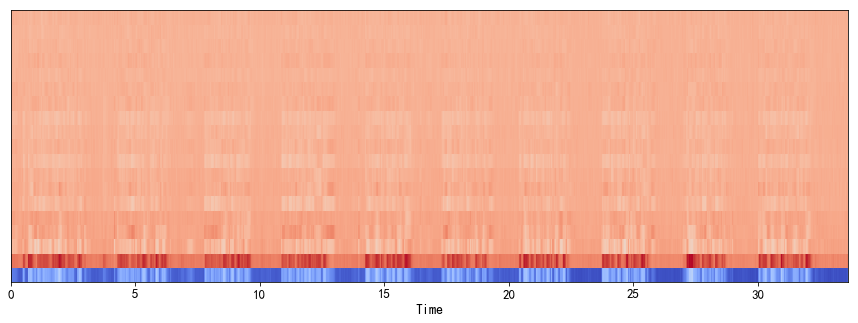

In [68]:
x, sr = librosa.load('OSR_us_000_0010_8k.wav')
mfccs = librosa.feature.mfcc(x, sr)
plt.figure(figsize = (15,5))
librosa.display.specshow(mfccs, sr=sr, x_axis="time")

plt.tick_params(axis = 'both', which = 'major', labelsize = 13)
plt.xlabel('Time',fontsize = 14)